In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize
plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [5]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Lianjia')  # 连接到Lianjia数据库

zufang = db.get_collection('zufang') # 连接到集合zufang
mon_data = zufang.find()  # 查询这个集合下的所有记录

In [6]:
data = json_normalize([comment for comment in mon_data])
data.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_price_listing,rent_price_unit,rent_type,resblock_name,type
0,5c9f6afd118dacbcd7cd34b4,1,1,安定门,北京,朝阳,552,1,近地铁 随时看房,整租 · 安定门 西营房 2号线 近地铁 精装修可随时入住,39.958188,1室1厅1卫,116.409688,https://m.lianjia.com/chuzu/bj/zufang/BJ220353...,6800,元/月,200600000001,西营房,整租
1,5c9f6afd118dacbcd7cd34b6,1,2,安定门,北京,朝阳,506,1,近地铁 集中供暖 随时看房,整租 · 永康胡同中间楼层两居室，南北通透，看房方便有钥匙,39.953993,2室1厅1卫,116.41695,https://m.lianjia.com/chuzu/bj/zufang/BJ221288...,8500,元/月,200600000001,永康胡同1号院,整租
2,5c9f6afe118dacbcd7cd34b8,1,2,安定门,北京,朝阳,960,1,近地铁 精装 集中供暖 随时看房,整租 · \n房子南北通透，二居室，前后无遮挡，小区安静,39.96471,2室1厅1卫,116.410078,https://m.lianjia.com/chuzu/bj/zufang/BJ221730...,7200,元/月,200600000001,黄寺大街2号院,整租
3,5c9f6afe118dacbcd7cd34ba,1,2,安定门,北京,朝阳,552,1,近地铁 精装 随时看房,整租 · 西营房 低楼层 精装修两居 采光好 临近安定门地铁,39.958188,2室1厅1卫,116.409688,https://m.lianjia.com/chuzu/bj/zufang/BJ221853...,10000,元/月,200600000001,西营房,整租
4,5c9f6afe118dacbcd7cd34bc,2,3,安定门,北京,朝阳,552,1,近地铁 精装 双卫生间 随时看房,整租 · 北二环 安定门 精装大三居 带电梯 视野开阔,39.958188,3室1厅2卫,116.409688,https://m.lianjia.com/chuzu/bj/zufang/BJ219691...,12000,元/月,200600000001,西营房,整租


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60172 entries, 0 to 60171
Data columns (total 19 columns):
_id                   60172 non-null object
bathroom_num          60172 non-null object
bedroom_num           60172 non-null object
bizcircle_name        60172 non-null object
city                  60172 non-null object
dist                  60172 non-null object
distance              37616 non-null object
hall_num              60172 non-null object
house_tag             49110 non-null object
house_title           60172 non-null object
latitude              60171 non-null object
layout                60172 non-null object
longitude             60171 non-null object
m_url                 60172 non-null object
rent_price_listing    60172 non-null object
rent_price_unit       60172 non-null object
rent_type             60172 non-null object
resblock_name         60172 non-null object
type                  60172 non-null object
dtypes: object(19)
memory usage: 4.4+ MB


In [8]:
# 数据清洗(按列清理)
# 1. 去掉“_id”列
data = data.drop(columns='_id')

In [9]:
data['bathroom_num'].unique()

array(['1', '2', '3', '0', '4', '5', '7', '6', '8', '9', '11'],
      dtype=object)

In [10]:
data[data['bathroom_num'].isin(['8', '9', '11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_price_listing,rent_price_unit,rent_type,resblock_name,type
9251,8,9,四季青,北京,海淀,725,6,精装,整租 · wehoue 城市别墅 联排别墅 私家电梯使用面积1200平米,39.947186,9室6厅8卫,116.275381,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,138000,元/月,200600000001,Wehouse,整租
13502,8,17,潞苑,北京,通州,None,3,精装 随时看房,整租 · 枫露皇苑 17室3厅 40000元,39.94142,17室3厅8卫,116.671872,https://m.lianjia.com/chuzu/bj/zufang/BJ221662...,40000,元/月,200600000001,枫露皇苑,整租
15245,9,9,北七家,北京,昌平,None,5,精装,整租 · 精装修独栋别墅，家具家电齐全，可直接入住！,40.146554,9室5厅9卫,116.418277,https://m.lianjia.com/chuzu/bj/zufang/BJ203027...,45000,元/月,200600000001,麦卡伦地,整租
26928,9,10,花木,上海,浦东,404,5,近地铁,花木路1701号 15房间9卫 330000元,31.220902,10室5厅9卫,121.570658,https://m.lianjia.com/chuzu/sh/zufang/SH212387...,330000,元/月,200600000000,花木路1701号,整租
31801,8,7,祝桥,上海,浦东,None,3,None,东海御庭 7室3厅 16000元,31.214139,7室3厅8卫,121.776494,https://m.lianjia.com/chuzu/sh/zufang/SH206789...,16000,元/月,200600000000,东海御庭,整租
36736,8,6,龙柏,上海,闵行,528,3,近地铁,整租 · 大降价！！性价别墅！！可整租可分层出租，价格可谈！,31.18634,6室3厅8卫,121.373958,https://m.lianjia.com/chuzu/sh/zufang/SH215562...,65000,元/月,200600000001,汇金公寓,整租
40376,8,8,莘闵别墅,上海,松江,None,4,None,桃花源田庄 精装 拎包入住 可办公可居家 200平地下室,31.101212,8室4厅8卫,121.354455,https://m.lianjia.com/chuzu/sh/zufang/SH219030...,40000,元/月,200600000000,桃花源田庄,整租
43289,8,8,赵巷,上海,青浦,None,6,None,整租 · 御湖香水湾，水景独栋，大花园，业主诚意出租。,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,30000,元/月,200600000001,香水湾,整租
49701,9,9,南湖,广州,天河,None,5,None,南湖庄园 9室5厅 50000元,23.217537,9室5厅9卫,113.332386,https://m.lianjia.com/chuzu/gz/zufang/GZ219970...,50000,元/月,200600000000,南湖庄园,整租
55615,11,2,东湖,广州,越秀,260,1,None,大沙头路两房 采光通风好,23.120535,2室1厅11卫,113.290942,https://m.lianjia.com/chuzu/gz/zufang/GZ216230...,4000,元/月,200600000000,大沙头路,整租


In [11]:
data['bedroom_num'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '14', '8', '9', '0', '17', '11',
       '10'], dtype=object)

In [12]:
# 无异常数据，只是很多10室以上的都是专门用来合租的
data[data['bedroom_num'].isin(['10', '11', '14', '17'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_price_listing,rent_price_unit,rent_type,resblock_name,type
2613,5,14,宣武门,北京,西城,354,3,近地铁 精装,整租 · 东北园 14室3厅 80000元,39.904562,14室3厅5卫,116.393907,https://m.lianjia.com/chuzu/bj/zufang/BJ221878...,80000,元/月,200600000001,东北园,整租
13502,8,17,潞苑,北京,通州,None,3,精装 随时看房,整租 · 枫露皇苑 17室3厅 40000元,39.94142,17室3厅8卫,116.671872,https://m.lianjia.com/chuzu/bj/zufang/BJ221662...,40000,元/月,200600000001,枫露皇苑,整租
24246,3,11,中山公园,上海,长宁,834,2,近地铁,利西路独栋洋房，市中内环内可办公 交通便利,31.220911,11室2厅3卫,121.436057,https://m.lianjia.com/chuzu/sh/zufang/SH221804...,95000,元/月,200600000000,利西路143号,整租
24799,3,10,长征,上海,普陀,1125,3,新上,名邸三层大别墅，十室可办公，品质社区,31.25033037,10室3厅3卫,121.3845601,https://m.lianjia.com/chuzu/sh/zufang/SH222004...,24000,元/月,200600000000,祥和名邸(别墅),整租
26928,9,10,花木,上海,浦东,404,5,近地铁,花木路1701号 15房间9卫 330000元,31.220902,10室5厅9卫,121.570658,https://m.lianjia.com/chuzu/sh/zufang/SH212387...,330000,元/月,200600000000,花木路1701号,整租
38458,3,10,嘉定新城,上海,嘉定,405,4,近地铁 精装,整租 · 阳光葡提公馆 14房间3卫 13500元,31.33711314,10室4厅3卫,121.2949683,https://m.lianjia.com/chuzu/sh/zufang/SH213808...,13500,元/月,200600000001,阳光葡提公馆,整租


In [13]:
# 4. distance
data['distance'].unique()

array(['552', '506', '960', ..., '1080', '103', '34'], dtype=object)

In [14]:
# 5. hall_num
data['hall_num'].unique()

array(['1', '2', '0', '3', '5', '4', '6', '7'], dtype=object)

In [15]:
data[data['hall_num'].isin(['6','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_price_listing,rent_price_unit,rent_type,resblock_name,type
9251,8,9,四季青,北京,海淀,725,6,精装,整租 · wehoue 城市别墅 联排别墅 私家电梯使用面积1200平米,39.947186,9室6厅8卫,116.275381,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,138000,元/月,200600000001,Wehouse,整租
43289,8,8,赵巷,上海,青浦,None,6,None,整租 · 御湖香水湾，水景独栋，大花园，业主诚意出租。,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,30000,元/月,200600000001,香水湾,整租
43337,6,6,朱家角,上海,青浦,699,6,近地铁,古北香堤艺墅 6室6厅 25000元,31.115688,6室6厅6卫,121.048724,https://m.lianjia.com/chuzu/sh/zufang/SH221518...,25000,元/月,200600000000,古北香堤艺墅,整租


In [16]:
# 6. rent_area
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


# data['rent_area'] = data['rent_area'].apply(get_aver)

In [17]:
# 7. rent_price_unit
data['rent_price_unit'].unique()

array(['元/月'], dtype=object)

In [18]:
#  租金都是以“元/月”计算的，所以这一列没用了，可以删了
# data = data.drop(columns='rent_price_unit')

In [19]:
# 8. rent_price_listing
data[data['rent_price_listing'].str.contains('-')].sample(3)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_price_listing,rent_price_unit,rent_type,resblock_name,type
57822,1,1,三元里,广州,越秀,None,0,独栋公寓,万科泊寓 广园中 阳光大开间 开间,23.166609,1室0厅1卫,113.27314,https://m.lianjia.com/chuzu/gz/apartment/layou...,2499-2699,元/月,200600000000,,整租
44592,1,2,东圃,广州,天河,None,1,独栋公寓,悦橄榄公寓 三溪店 C202 二居+,23.120949,2室1厅1卫,113.414952,https://m.lianjia.com/chuzu/gz/apartment/layou...,1588-1688,元/月,200600000000,,整租
46354,1,2,黄村,广州,天河,None,1,独栋公寓 月租,职业房东 恒东公寓珠村店 三巷一号两房一厅 二居+,23.122908,2室1厅1卫,113.428314,https://m.lianjia.com/chuzu/gz/apartment/layou...,1500-2800,元/月,200600000000,,整租


In [20]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [21]:
# 数据类型转换
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

In [22]:
# 'distance', 'latitude', 'longitude'因为有None，需另外处理
def dw_None_dis(data):
    if data is None:
        return np.nan
    else:
        return float(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [23]:
data.sample(5)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_price_listing,rent_price_unit,rent_type,resblock_name,type
34221,2,4,北外滩,上海,虹口,790.0,2,近地铁,豪景苑 4室2厅 25000元,31.252958,4室2厅2卫,121.494752,https://m.lianjia.com/chuzu/sh/zufang/SH221244...,25000,元/月,200600000000,豪景苑,整租
50876,1,3,同和,广州,天河,661.0,2,近地铁,倚绿山庄 3室2厅 4500元,23.206045,3室2厅1卫,113.329578,https://m.lianjia.com/chuzu/gz/zufang/GZ220715...,4500,元/月,200600000000,倚绿山庄,整租
39222,2,3,南翔,上海,嘉定,NaN,2,精装 双卫生间 随时看房,整租 · 中童巴比尼 5房间2卫 6000元,31.310117,3室2厅2卫,121.337137,https://m.lianjia.com/chuzu/sh/zufang/SH213741...,6000,元/月,200600000001,中童巴比尼,整租
56980,1,2,建设路,广州,越秀,282.0,1,近地铁,青菜东街 温馨两房 头一次出租 格局方正 南北对流,23.138988,2室1厅1卫,113.294230,https://m.lianjia.com/chuzu/gz/zufang/GZ211493...,4000,元/月,200600000000,先烈南路青菜东街,整租
53326,1,2,员村,广州,天河,1046.0,1,近地铁,佳润临江上品 2室1厅 5300元,23.117530,2室1厅1卫,113.380130,https://m.lianjia.com/chuzu/gz/zufang/GZ213692...,5300,元/月,200600000000,佳润临江上品,整租


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60172 entries, 0 to 60171
Data columns (total 18 columns):
bathroom_num          60172 non-null int32
bedroom_num           60172 non-null int32
bizcircle_name        60172 non-null object
city                  60172 non-null object
dist                  60172 non-null object
distance              37616 non-null float64
hall_num              60172 non-null int32
house_tag             49110 non-null object
house_title           60172 non-null object
latitude              60171 non-null float64
layout                60172 non-null object
longitude             60171 non-null float64
m_url                 60172 non-null object
rent_price_listing    60172 non-null int32
rent_price_unit       60172 non-null object
rent_type             60172 non-null object
resblock_name         60172 non-null object
type                  60172 non-null object
dtypes: float64(3), int32(4), object(11)
memory usage: 4.8+ MB


In [25]:
data.to_csv('data_clean.csv', index=False)

问题：

1各城市的租房分布怎么样？

2城市各区域的房价分布怎么样？

3距离地铁口远近有什么关系？

4房屋大小对价格的影响如何？

5租个人房源好还是公寓好？

6精装和简装对房子价格的影响

7北方集中供暖对价格的影响

8北上广深租房时都看重什么？


### 1. 各城市的租房分布怎么样？

In [26]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city'] == city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city + '的数据一共有{}条'.format(data_latlon.shape[0]))

get_city_zf_loc('北京', 'bj', ['longitude','latitude', 'dist'])
get_city_zf_loc('上海', 'sh', ['longitude','latitude', 'dist'])
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])

北京的数据一共有19030条
上海的数据一共有24434条
广州的数据一共有16707条


C:\Users\ybsde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


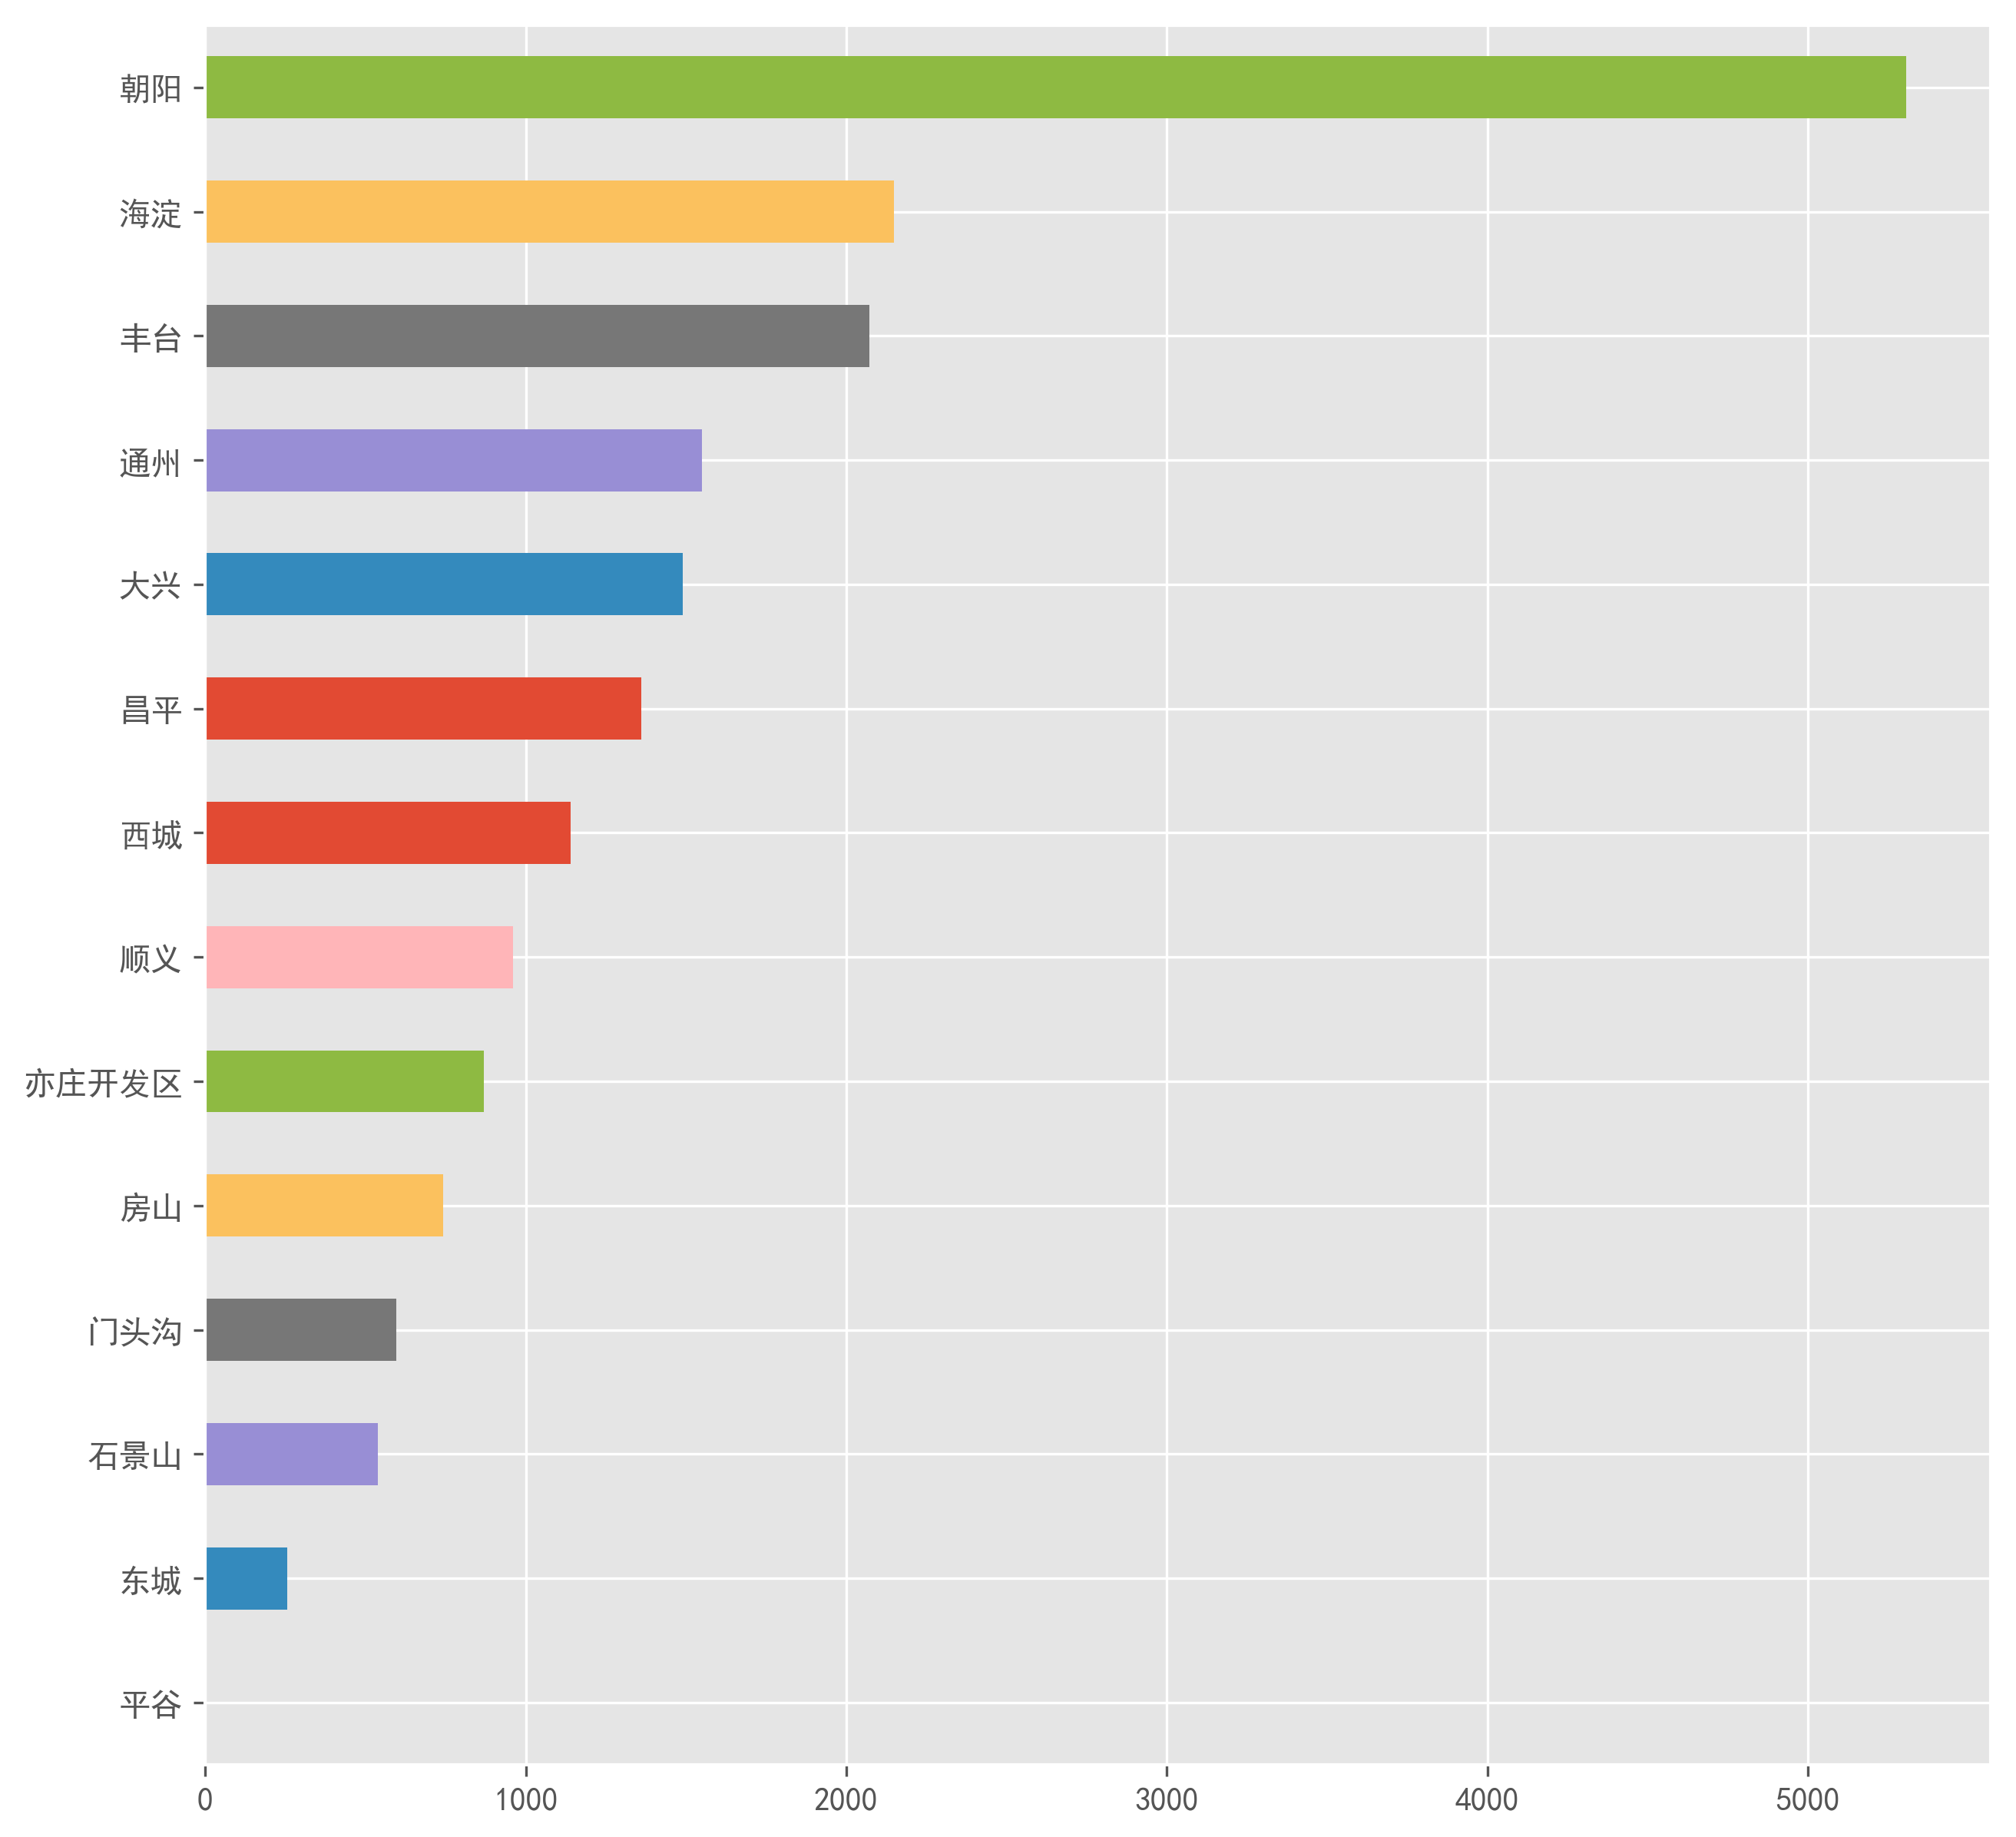

In [27]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()


C:\Users\ybsde\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


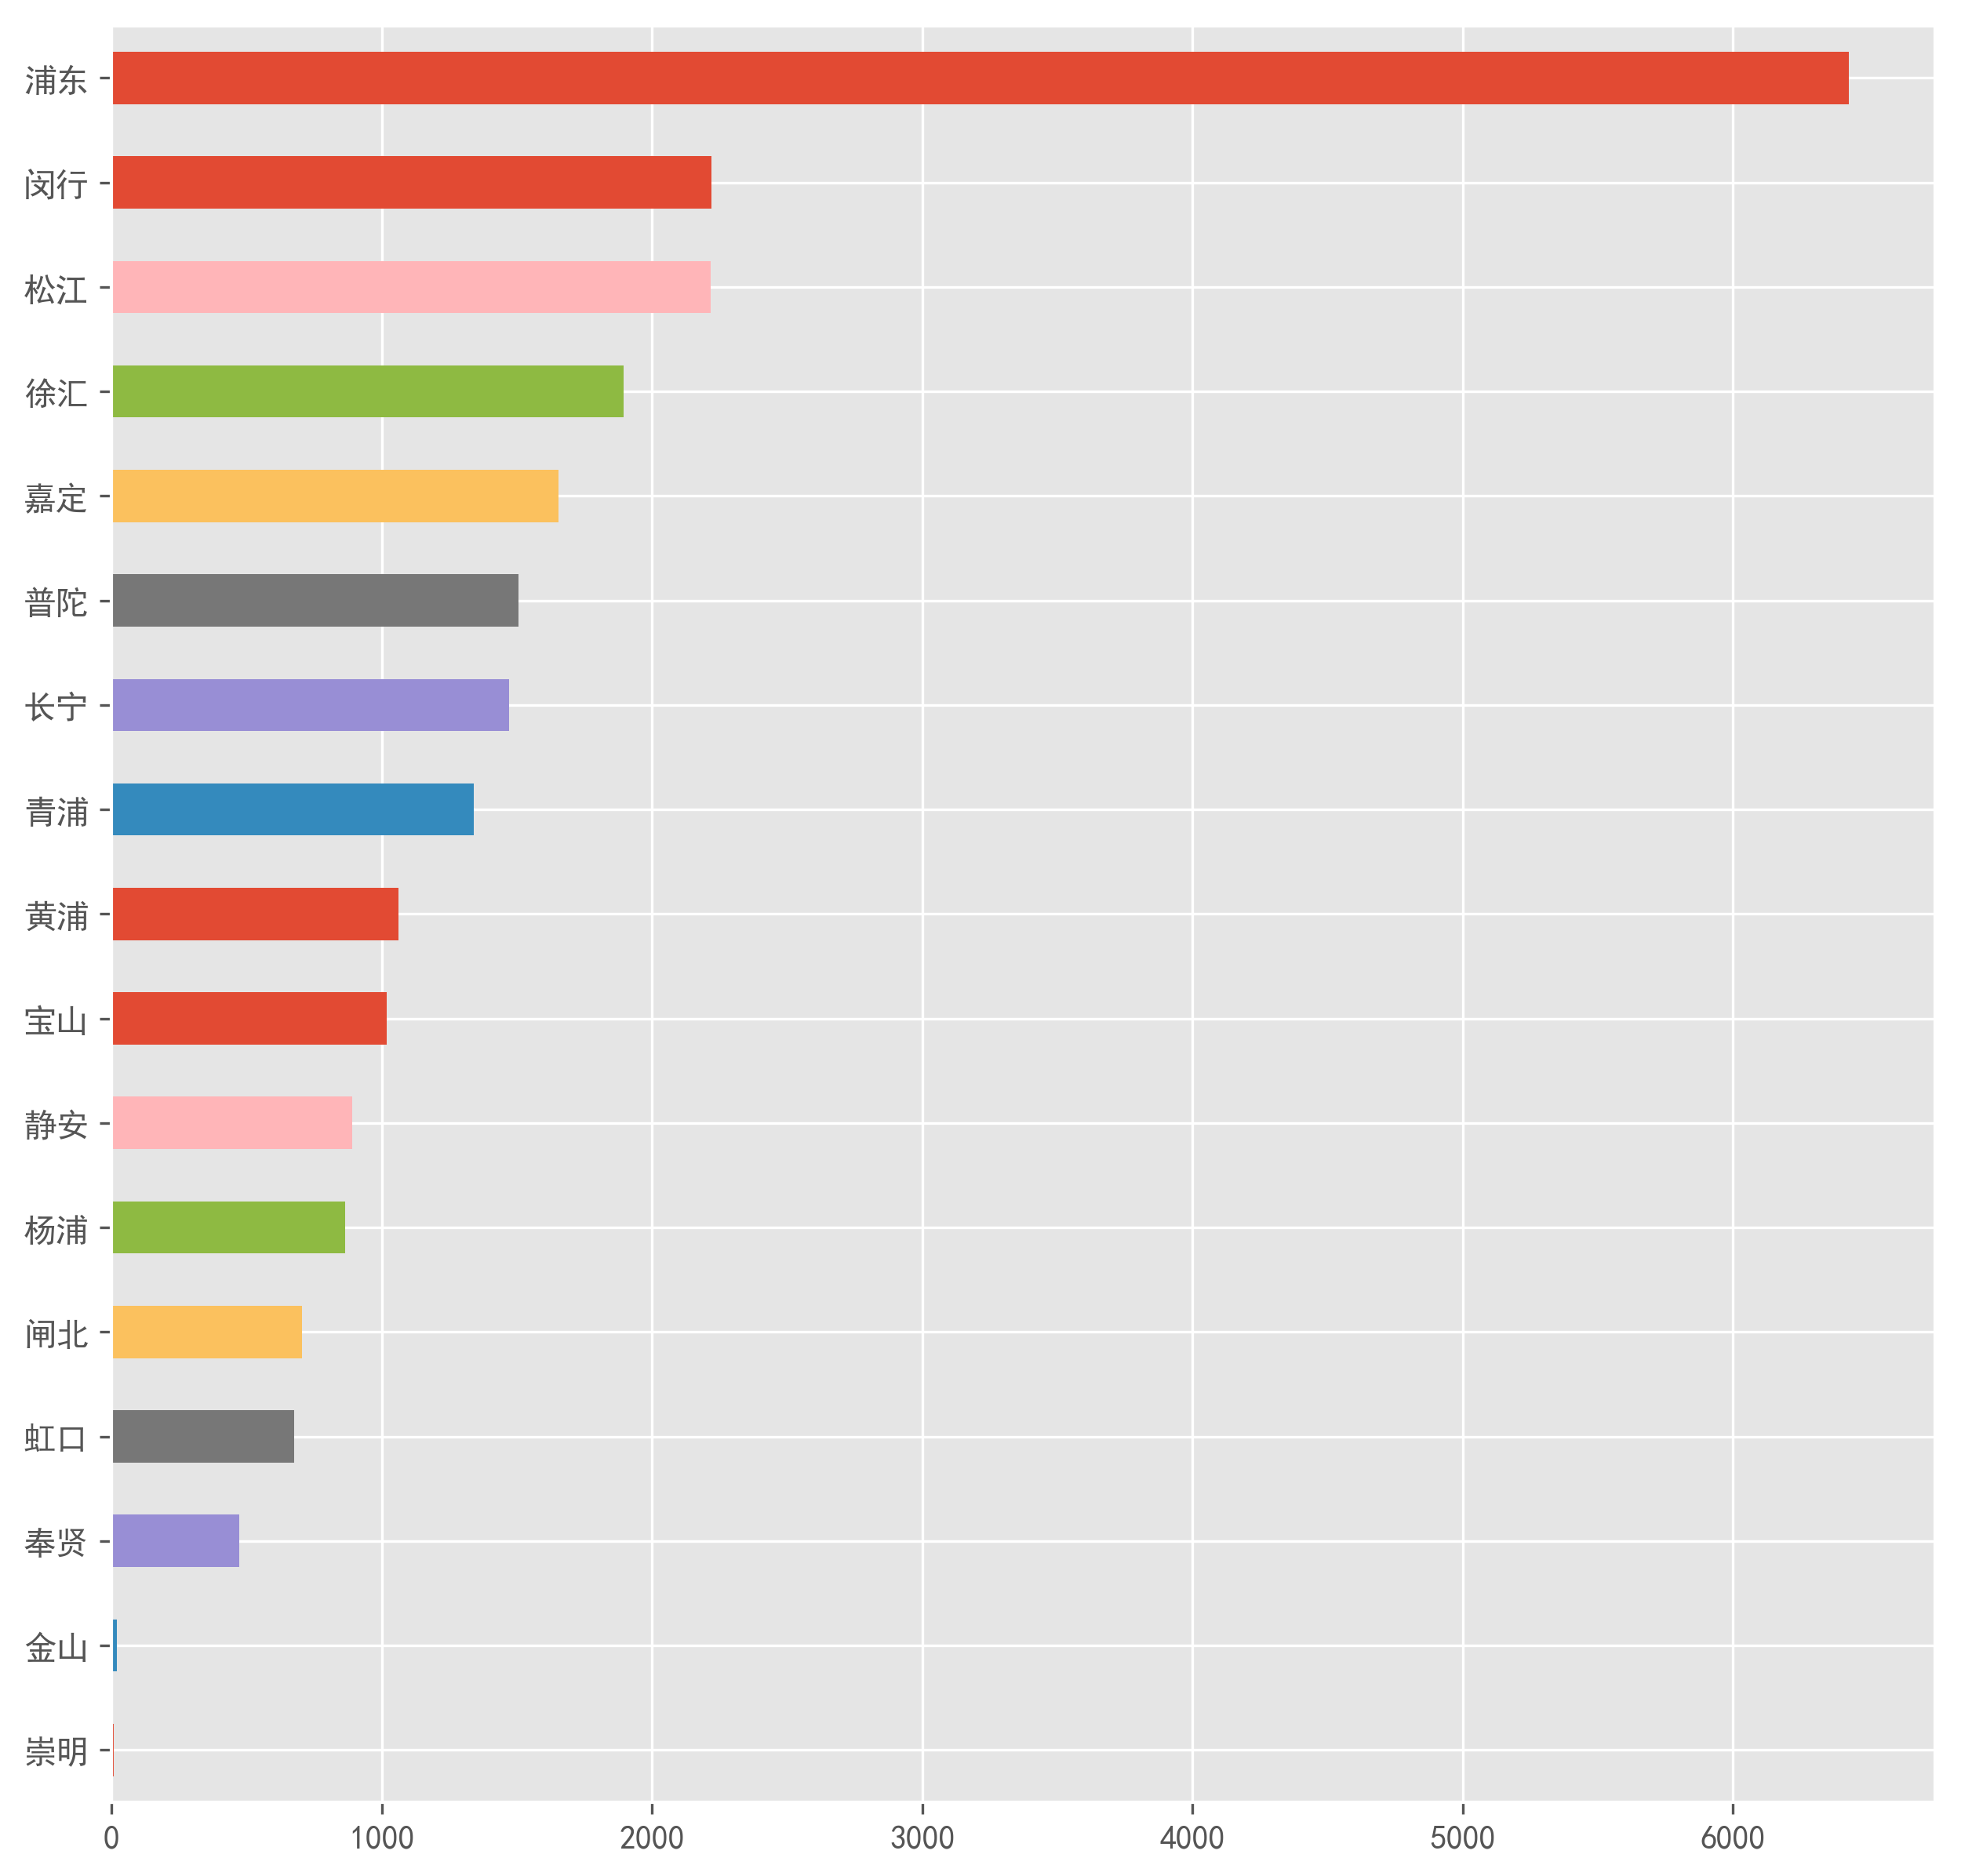

In [28]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()


### 2.各区域的放假怎么样

In [29]:
data['aver_price'] = np.round(data['rent_price_listing'] / 30, 1)

In [30]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

ValueError: dpi must be positive

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0D96B738> (for post_execute):


ValueError: dpi must be positive

ValueError: dpi must be positive

<Figure size 0x0 with 3 Axes>

In [ ]:
# 由于平均租金基本上都集中在250元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=250), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [ ]:
get_city_zf_aver_price('北京', 'bj')
get_city_zf_aver_price('上海', 'sh')
get_city_zf_aver_price('广州', 'gz')

In [31]:
# 各城市租金Top10的商圈
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()

In [32]:
from pyecharts import Bar

bar = Bar("每平米平均租金前50的北上广深商圈数量", width=400)
bar.add("", bc_top10.index, bc_top10.values, is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, is_label_show=True)
bar

In [33]:
def get_top10_bc(city, data=data):
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    bar = Bar(city+"市每平米平均租金Top10的商圈", width=600)
    bar.add("", top10_bc.index, np.round(top10_bc.values, 0), is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, xaxis_rotate=30, is_label_show=True)
    return bar

In [35]:
# 北京每平米平均租金Top10的商圈
get_top10_bc('北京')

In [40]:
from scipy import stats
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=30)].dropna(subset=['distance']), 
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

In [42]:
# distance_price_relation('北京')

### 租个人房源好还是公寓好？

In [44]:
is_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()

KeyError: 'is_dep'

In [46]:
data['decorated'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')

In [48]:
decorated = data[data['decorated']==1].groupby('city')['aver_price'].mean()

In [50]:
not_decorated = data[data['decorated']==0].groupby('city')['aver_price'].mean()

In [52]:
bar = Bar("各城市精装和简装的每平米租金差别", width=600)
bar.add("精装(刷过墙)", decorated.index, np.round(decorated.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装(破房子)", not_decorated.index, np.round(not_decorated.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

In [54]:
is_dec_dep = data[(data['decorated']==1)&
                  (data['is_dep']==1)&
                 (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

KeyError: 'is_dep'

### 7 北方集中供暖对价格的影响

In [58]:
data['ct_heating'] = data['house_tag'].str.contains('集中供暖')

In [60]:
data[data['city']=='北京'].groupby('ct_heating')['aver_price'].mean()

ct_heating
False    327.003181
True     294.263536
Name: aver_price, dtype: float64

### 8 各城市房屋租售比

In [63]:
zs_ratio = [57036, 62779, 32039, 56758]/(data.groupby('city')['rent_price_listing'].sum()/data.groupby('city')['rent_area'].sum())/12

KeyError: 'Column not found: rent_area'

### 9 北上广租房时都看重什么？

In [65]:
def layout_top3(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)
    bar = Bar(city+"最受欢迎的户型", width=600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    return bar

In [67]:
layout_top3('北京', data)

In [69]:
layout_top3('上海', data)

In [71]:
layout_top3('广州', data)

In [74]:
import collections
from pyecharts import WordCloud
bj_tag = []
for st in data[data['city']=='北京'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(collections.Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

In [77]:
sh_tag = []
for st in data[data['city']=='上海'].dropna(subset=['house_tag'])['house_tag']:
    sh_tag.extend(st.split(' '))

name, value = WordCloud.cast(collections.Counter(sh_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

In [78]:
gz_tag = []
for st in data[data['city']=='广州'].dropna(subset=['house_tag'])['house_tag']:
    gz_tag.extend(st.split(' '))

name, value = WordCloud.cast(collections.Counter(gz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud